In [ ]:
 #Importing libraries

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import zipfile
import os
import cv2
import numpy as np
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
# from keras.utils import np_utils
# from keras_preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=3bfa3f1da6a8c510e25c8c63ca89455dfe9c2a191832591b4a0f7a462d8398a9
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


The colab is linked to the drive using drive.mount so that it is easy to access zip file of the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Loading the dataset from the drive and extracting in the /tmp directory

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/1024+.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()#Close the zip file


In [ ]:
#changing the names of folder from french names to english names.
os.rename('/tmp/entrainement','/tmp/train_set')
os.rename('/tmp/test','/tmp/test_set')

In [ ]:
#changingfor training set
os.rename('/tmp/train_set/Verre','/tmp/train_set/Glass_bottle')
os.rename('/tmp/train_set/Papier_Carton','/tmp/train_set/Paper_cardboard')
os.rename('/tmp/train_set/Bouteille_plastique','/tmp/train_set/Plastic_bottle')
os.rename('/tmp/train_set/Brique_en_carton','/tmp/train_set/Cardboard_brick')
os.rename('/tmp/train_set/Emballage_metallique','/tmp/train_set/Metal_packaging')
os.rename('/tmp/train_set/Ordure_m∩┐╜nag∩┐╜re','/tmp/train_set/Household_garbage')
#changing for test set
os.rename('/tmp/test_set/Verre','/tmp/test_set/Glass_bottle')
os.rename('/tmp/test_set/Papier_Carton','/tmp/test_set/Paper_cardboard')
os.rename('/tmp/test_set/Bouteille_plastique','/tmp/test_set/Plastic_bottle')
os.rename('/tmp/test_set/Brique_en_carton','/tmp/test_set/Cardboard_brick')
os.rename('/tmp/test_set/Emballage_metallique','/tmp/test_set/Metal_packaging')
os.rename('/tmp/test_set/Ordure_m∩┐╜nag∩┐╜re','/tmp/test_set/Household_garbage')

In [ ]:
listdir=['/tmp/train_set/Paper_cardboard','/tmp/train_set/Plastic_bottle','/tmp/train_set/Cardboard_brick','/tmp/train_set/Metal_packaging','/tmp/train_set/Household_garbage']
dir='/tmp/train_set/Glass_bottle'

new=[os.rename(os.path.join(dir,f),os.path.join(dir,f).replace('papier_carton','Glass_bottle')) for f in os.listdir(dir)]
paperCardboard_dir='/tmp/train_set/Paper_cardboard'

paperCardboard=[os.rename(os.path.join(paperCardboard_dir,f),os.path.join(paperCardboard_dir,f).replace('Papier_carton','Paper_Cardboard')) for f in os.listdir(paperCardboard_dir)]
dir='/tmp/train_set/Cardboard_brick'
new_names=[os.rename(os.path.join(dir,f),os.path.join(dir,f).replace('Brique_en_carton','Cardboard_brick')) for f in os.listdir(dir)]
dir='/tmp/train_set/Plastic_bottle'
new_names=[os.rename(os.path.join(dir,f),os.path.join(dir,f).replace('bouteille_plastique','Plastic_bottle')) for f in os.listdir(dir)]
dir='/tmp/train_set/Metal_packaging'
new_names=[os.rename(os.path.join(dir,f),os.path.join(dir,f).replace('metal','Metal_packaging')) for f in os.listdir(dir)]
dir='/tmp/train_set/Household_garbage'
new_names=[os.rename(os.path.join(dir,f),os.path.join(dir,f).replace('Ordure_menagere','Household_garbage')) for f in os.listdir(dir)]

In [ ]:
# file_name = os.listdir('/tmp/train_set/Cardboard_brick')[0]
# extracted_str= file_name[0:]
# print(file_name)
# type(file_name)

Brique_en_carton_685.jpg


str

###Removing gifs files from dataset

In [ ]:
list_of_dirs=['/tmp/train_set/Paper_cardboard','/tmp/train_set/Glass_bottle','/tmp/train_set/Plastic_bottle','/tmp/train_set/Cardboard_brick','/tmp/train_set/Metal_packaging','/tmp/train_set/Household_garbage']

for dir in list_of_dirs:
  test = os.listdir(dir)
  for item in test:
    if item.endswith(".gif"):
        os.remove(os.path.join(dir, item))

os.remove('/tmp/train_set/Plastic_bottle/Plastic_bottle_7.jpg')

**DESCRIPTIVE ANALYTICS**

In [ ]:
train_path= "/tmp/train_set"
test_path="/tmp/test_set"

In [ ]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory("/tmp/train_set/")
class_names_train = dataset_train.class_names
print(class_names_train)

dataset_test = tf.keras.preprocessing.image_dataset_from_directory("/tmp/test_set/")
class_names_test = dataset_test.class_names
print(class_names_test)

Found 7018 files belonging to 6 classes.
['Cardboard_brick', 'Glass_bottle', 'Household_garbage', 'Metal_packaging', 'Paper_cardboard', 'Plastic_bottle']
Found 157 files belonging to 6 classes.
['Cardboard_brick', 'Glass_bottle', 'Household_garbage', 'Metal_packaging', 'Paper_cardboard', 'Plastic_bottle']


Our dataset is divided into training and validation set

The training set and validation set is further divided into biodegradable and non-biodegradable category

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/tmp/train_set/",
    shuffle=True, #shuffling images
    image_size = (512,512), #resizing images
    batch_size = 32 #Dividing the images into batches
)

Found 7018 files belonging to 6 classes.


In [ ]:
#Displaying class names of each dataset
class_names = dataset_train.class_names
class_names

['Cardboard_brick',
 'Glass_bottle',
 'Household_garbage',
 'Metal_packaging',
 'Paper_cardboard',
 'Plastic_bottle']

In [ ]:
len(dataset_train) #This denotes the length of every batch
# 397*32=12704
#This will not come exact as the dataset might be imbalanced

220

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_train.take(1):
  print(image_batch.shape)

(32, 256, 256, 3)


<Figure size 1000x1000 with 0 Axes>

(32,256,256,3)
This implies that our dataset is divided into 32 batches each and has fixed image size of (256x256) pixels. There are 3 channels denoted by rgb. Since the data has images, it can only be computed using a 3x3 matrix.

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_train.take(1):
    np_train = np.array(image_batch)
    print(image_batch[0].numpy())
    np_train_scaled = np_train/255 #normalizing the dataset between 0 and 1

# This shows how the dataset is divided into 3x3 matrix

[[[ 61.640625  60.640625  65.640625]
  [ 63.015625  63.015625  64.515625]
  [ 58.609375  58.609375  57.109375]
  ...
  [122.1875    83.1875    76.1875  ]
  [121.078125  82.828125  74.328125]
  [111.671875  73.671875  64.671875]]

 [[ 70.421875  70.421875  72.421875]
  [ 46.4375    46.4375    47.9375  ]
  [ 20.328125  20.328125  18.828125]
  ...
  [114.796875  77.796875  69.796875]
  [112.875     75.875     67.875   ]
  [117.890625  80.890625  71.890625]]

 [[ 45.84375   45.84375   47.84375 ]
  [ 21.390625  21.390625  21.390625]
  [ 60.078125  60.078125  58.578125]
  ...
  [114.890625  80.140625  73.390625]
  [120.59375   86.59375   77.59375 ]
  [114.078125  80.078125  71.078125]]

 ...

 [[ 17.140625  22.140625  16.140625]
  [ 19.40625   24.40625   18.40625 ]
  [ 20.0625    25.0625    19.0625  ]
  ...
  [150.15625  143.15625  124.40625 ]
  [145.23438  138.23438  120.234375]
  [141.125    136.125    117.125   ]]

 [[ 16.0625    21.0625    17.0625  ]
  [ 17.609375  22.609375  18.609375]


<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_train.take(1):
  print(np_train_scaled[0]) #Scaled Between 0 and 1

[[[0.24172795 0.23780638 0.25741422]
  [0.2471201  0.2471201  0.25300246]
  [0.22984068 0.22984068 0.22395833]
  ...
  [0.47916666 0.3262255  0.2987745 ]
  [0.47481617 0.32481617 0.29148284]
  [0.43792892 0.28890932 0.2536152 ]]

 [[0.2761642  0.2761642  0.28400734]
  [0.18210784 0.18210784 0.1879902 ]
  [0.07971814 0.07971814 0.07383578]
  ...
  [0.4501838  0.30508578 0.27371323]
  [0.44264707 0.297549   0.26617646]
  [0.4623162  0.31721812 0.281924  ]]

 [[0.17977941 0.17977941 0.18762255]
  [0.08388481 0.08388481 0.08388481]
  [0.23560049 0.23560049 0.22971813]
  ...
  [0.45055148 0.31427696 0.28780636]
  [0.47291666 0.33958334 0.30428922]
  [0.4473652  0.31403187 0.27873775]]

 ...

 [[0.06721814 0.08682598 0.06329657]
  [0.07610294 0.09571078 0.07218137]
  [0.07867647 0.09828431 0.0747549 ]
  ...
  [0.58884805 0.5613971  0.48786765]
  [0.5695466  0.5420956  0.47150734]
  [0.5534314  0.53382355 0.45931372]]

 [[0.0629902  0.08259804 0.06691176]
  [0.06905637 0.08866422 0.07297794]


<Figure size 1000x1000 with 0 Axes>

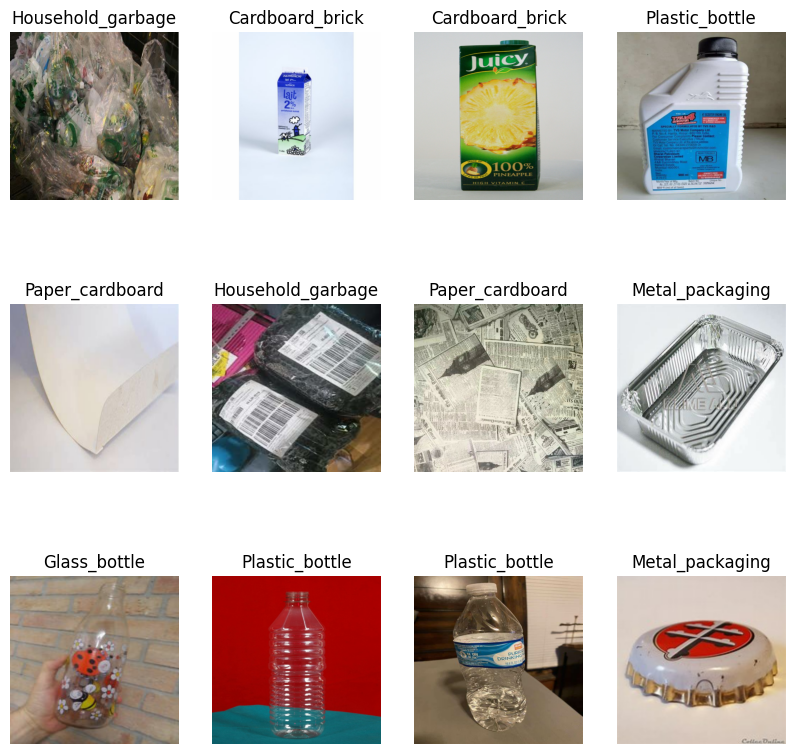

In [ ]:
#Plotting the dataset for a set of 12 images
plt.figure(figsize=(7,7))
for image_batch, label_batch in dataset_train.take(1): #The take() function is used to return the elements in the given positional indices along an axis
  for i in range(12): # Displaying 12 images from first batch
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


**DATA VISUALIZATION**

# **Bar and Pie Plot**


In [ ]:
# for images in training dataset, we define a path for each of the classes using dictionary
train = {'Cardboard_brick': len(os.listdir(f'{train_path}/Cardboard_brick')),
'Glass_bottle': len(os.listdir(f'{train_path}/Glass_bottle')),
'Household_garbage': len(os.listdir(f'{train_path}/Household_garbage')),
'Metal_packaging': len(os.listdir(f'{train_path}/Metal_packaging')),
'Paper_cardboard': len(os.listdir(f'{train_path}/Paper_cardboard')),
'Plastic_bottle': len(os.listdir(f'{train_path}/Plastic_bottle'))
}

In [ ]:
print(train.items())

dict_items([('Cardboard_brick', 1049), ('Glass_bottle', 1232), ('Household_garbage', 1050), ('Metal_packaging', 1217), ('Paper_cardboard', 1046), ('Plastic_bottle', 1439)])


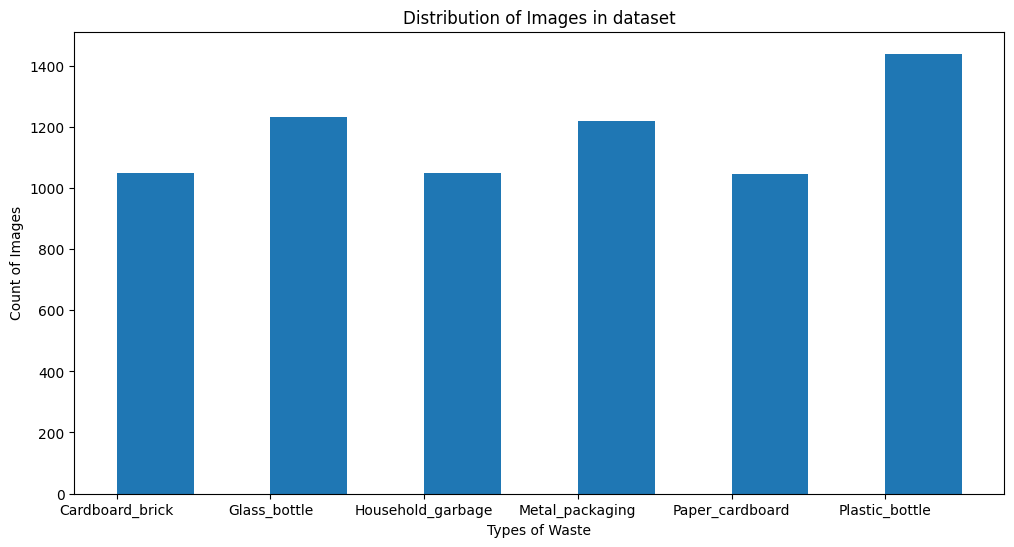

In [ ]:
#Plotting Bar Graph
plt.figure(figsize=(12, 6))  # width:12, height:6
plt.bar(train.keys(), train.values(), align='edge', width=0.5)
plt.title("Distribution of Images in dataset");
plt.xlabel('Types of Waste');
plt.ylabel('Count of Images');

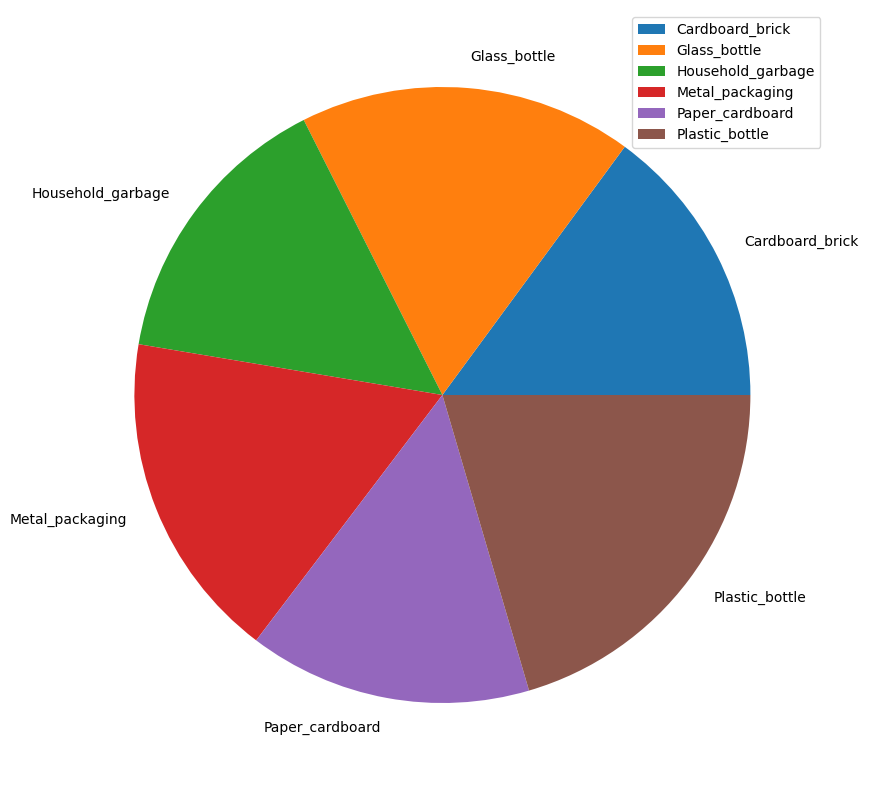

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(train.values(), labels = train.keys())
plt.legend()
plt.show()

From the bar plot it can inferred that we have maximum number of food waste images around 10k followed by leaf waste, paper waste and wood waste for biodegradable waste whereas maximum images are from metal cans category that is around 680 followed by plastic bottles, plastic bags and then ewaste for non biodegradable waste

Repeating the above steps for validation dataset

In [ ]:
test = {'Cardboard_brick': len(os.listdir(f'{test_path}/Cardboard_brick')),
'Glass_bottle': len(os.listdir(f'{test_path}/Glass_bottle')),
'Household_garbage': len(os.listdir(f'{test_path}/Household_garbage')),
'Metal_packaging': len(os.listdir(f'{test_path}/Metal_packaging')),
'Paper_cardboard': len(os.listdir(f'{test_path}/Paper_cardboard')),
'Plastic_bottle': len(os.listdir(f'{test_path}/Plastic_bottle'))
}

In [ ]:
print(test.items())

dict_items([('Cardboard_brick', 15), ('Glass_bottle', 28), ('Household_garbage', 10), ('Metal_packaging', 25), ('Paper_cardboard', 44), ('Plastic_bottle', 35)])


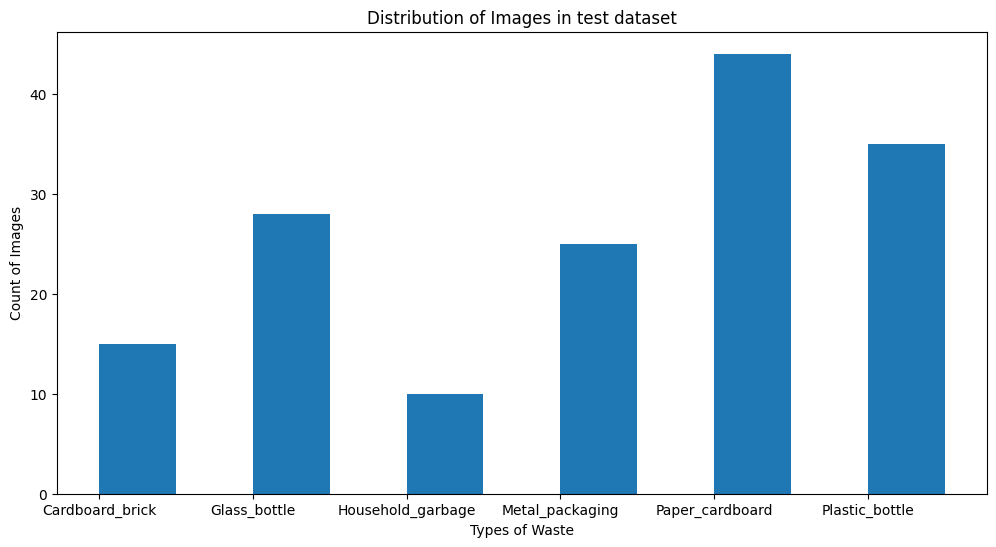

In [ ]:
#Plotting Bar Graph
plt.figure(figsize=(12, 6))  # width:20, height:3
plt.bar(test.keys(), test.values(), align='edge', width=0.5)
plt.title("Distribution of Images in test dataset");
plt.xlabel('Types of Waste');
plt.ylabel('Count of Images');

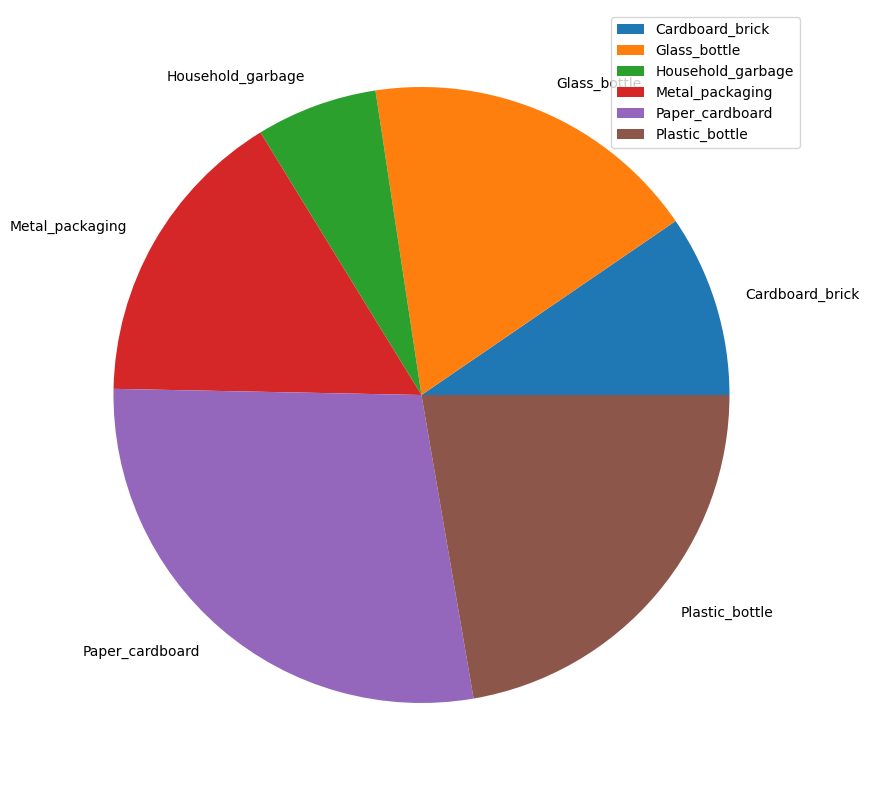

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(test.values(), labels = test.keys())
plt.legend()
plt.show()

From the above plots, it can be inferred that we have maximumn number of leaf waste images around 400 in our dataset followed by food waste, paper waste and wood waste for biodegradable waste whereas  maximum images are from plastic waste category that is around 125 followed by metal cans, ewaste and then plastic bags in the validation dataset of non biodegradable waste.

**Visualization of Intensity distribution using histogram.**

*For grayscale image*

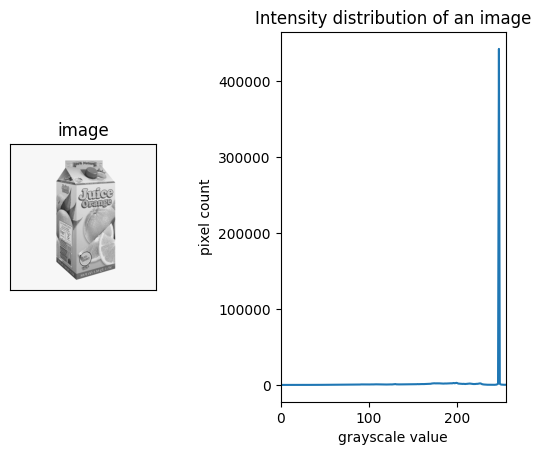

In [ ]:
#reading an image using cv2
path=r'/tmp/train_set/Cardboard_brick/Cardboard_brick_1.jpg'
img = cv2.imread(path,0)

#plotting the image
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])
#plotting the histogram
plt.subplot(1,2,2)
hist,bin = np.histogram(img.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.xlabel('grayscale value')
plt.ylabel('pixel count')
plt.title('Intensity distribution of an image')
plt.show()

*For colored Image*

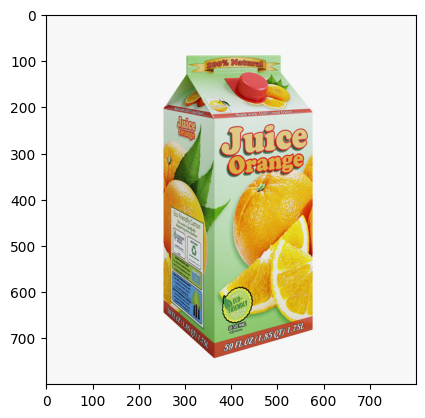

In [ ]:
# Read Images
img = mpimg.imread('/tmp/train_set/Cardboard_brick/Cardboard_brick_1.jpg')

# Output Images
plt.imshow(img)

In [ ]:
# Get RGB data from image
blue_color = cv2.calcHist([img], [0], None, [256], [0, 256])
red_color = cv2.calcHist([img], [1], None, [256], [0, 256])
green_color = cv2.calcHist([img], [2], None, [256], [0, 256])

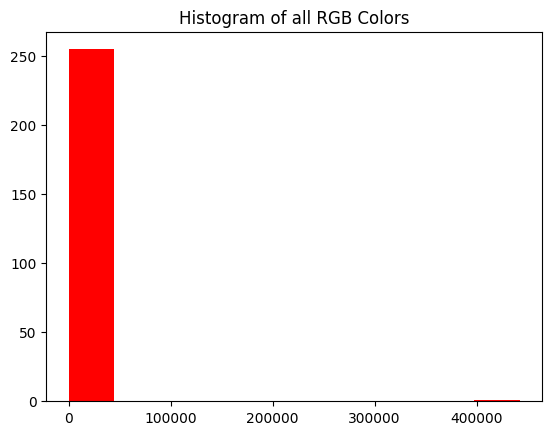

In [ ]:
#plotting the histogram.
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()


**Data Augmentation**



Data Augmentation is used while training the data so as to avoid overfitting by adding sample of images which are flipped, rotated and zoomed.

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'), # It will randomly flips images while training in
    layers.experimental.preprocessing.RandomRotation(0.2), #It will randomly rotate the images in 20% range
    layers.experimental.preprocessing.RandomZoom(0.3, 0.2), #It will randomly zoom images with an height and width factor of 30% and 20% respectively
  ]
)

## **TRAIN TEST SPLIT**

In [ ]:
#defining categories for each kind of waste
categories = ['Cardboard_brick','Glass_bottle','Household_garbage','Metal_packaging','Paper_cardboard','Plastic_bottle']

In [ ]:
data = []
dir = "/tmp/train_set/"

In [ ]:
# train = tf.keras.preprocessing.image_dataset_from_directory(
#     '/tmp/train_set/',
#     labels = 'inferred',
#     label_mode = 'categorical',
#     class_names = ['NORMAL', 'PNEUMONIA'],
#     color_mode = 'grayscale',
#     batch_size = batch_size,
#     image_size = (image_height, image_width),
#     shuffle = True
#     )

In [ ]:
img= os.listdir('/tmp/train_set/Cardboard_brick')[1]
print(img)

Cardboard_brick_397.jpg


In [ ]:
#dividing the images into features and labels category where labels will be the target column for training the model
for category in categories:
  path = os.path.join(dir,category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path,img)
    waste_img = cv2.imread(imgpath,0)
    waste_img = cv2.resize(waste_img,(64,64))
    image = np.array(waste_img).flatten()

    data.append([image,label])

In [ ]:
print(len(data))

7018


In [ ]:
lenofimage = len(data)

for image to be trained we have to convert the image to a array form so,that our model can train on it...!!

and X should be of type (training_data_length , -1) because SVM takes 2D input to train

In [ ]:
X=[]
y=[]

for feature, label in data:
    X.append(feature)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [ ]:
X.shape

(7018, 4096)

In [ ]:
#flattening the array
X = X/255.0

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(7018,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## **Support Vector Classifier**

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y2 = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.6507122507122507


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69       265
           1       0.54      0.67      0.60       309
           2       0.74      0.71      0.73       251
           3       0.72      0.62      0.67       288
           4       0.62      0.62      0.62       247
           5       0.63      0.62      0.63       395

    accuracy                           0.65      1755
   macro avg       0.66      0.65      0.66      1755
weighted avg       0.66      0.65      0.65      1755



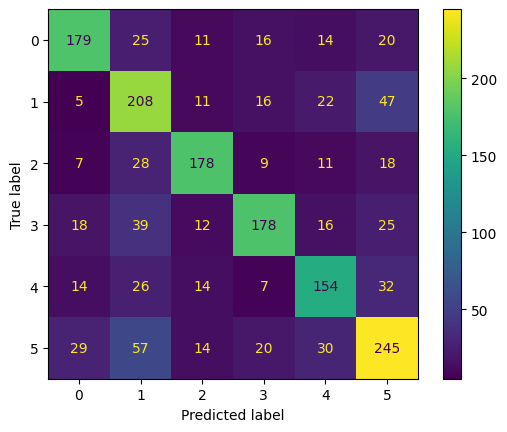

In [ ]:
# from sklearn import metrics
# print(metrics.classification_report(ytest, prediction))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y2)

color='white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()

In [ ]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result

,original,predicted
0,4,4
1,5,5
2,4,1
3,1,1
4,5,5
...,...,...
1750,2,2
1751,1,3
1752,5,5
1753,0,3


**Naive Bayes**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
prediction = nb.predict(X_test)
accuracy = nb.score(X_test,y_test)

In [ ]:
print('Accuracy: ', accuracy)
print('Prediction: ', categories[prediction[0]])

Accuracy:  0.32706552706552705
Prediction:  Metal_packaging


In [ ]:
cm = confusion_matrix(y_test, prediction)

color='white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.show()

**K-Nearest Neighbours**

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Required neighbours of algorithm are taken as 7.
metric='minkowski': This is the default parameter and it decides the distance between the points.
p=2: It is equivalent to the standard Euclidean metric.

In [ ]:
prediction = knn.predict(X_test)
accuracy = knn.score(X_test,y_test)

In [ ]:
print('Accuracy: ', accuracy)
print('Prediction: ', categories[prediction[0]])

Accuracy:  0.4826210826210826
Prediction:  Paper_cardboard


In [ ]:
cm = confusion_matrix(y_test, prediction)

color='white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

## **Decision Tree Classifier**

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy', random_state=7)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

"criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.

In [ ]:
prediction = dtc.predict(X_test)
accuracy_dtc = dtc.score(X_test,y_test)

In [ ]:
print('Accuracy: ', accuracy_dtc)
print('Prediction: ', categories[prediction[0]])

Accuracy:  0.5811965811965812
Prediction:  Paper_cardboard


In [ ]:
cm = confusion_matrix(y_test, prediction)

color='white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()

## **Random Forest Classifier**

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. It uses the concept of ensemble learning.

In [ ]:
rf=RandomForestClassifier(n_estimators= 100, criterion="entropy")

No. of tress in random forest used are 100 and criterion is taken as entropy as a part of information gain.

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
prediction = rf.predict(X_test)
accuracy = rf.score(X_test,y_test)

In [ ]:
print('Accuracy: ', accuracy)
print('Prediction: ', categories[prediction[0]])

Accuracy:  0.7578347578347578
Prediction:  Paper_cardboard


In [ ]:
cm = confusion_matrix(y_test, y2)

color='white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()

Balancing the dataset and applying Decision Tree and Random Forest

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_sampled,y_sampled = resample.fit_resample(X, y)

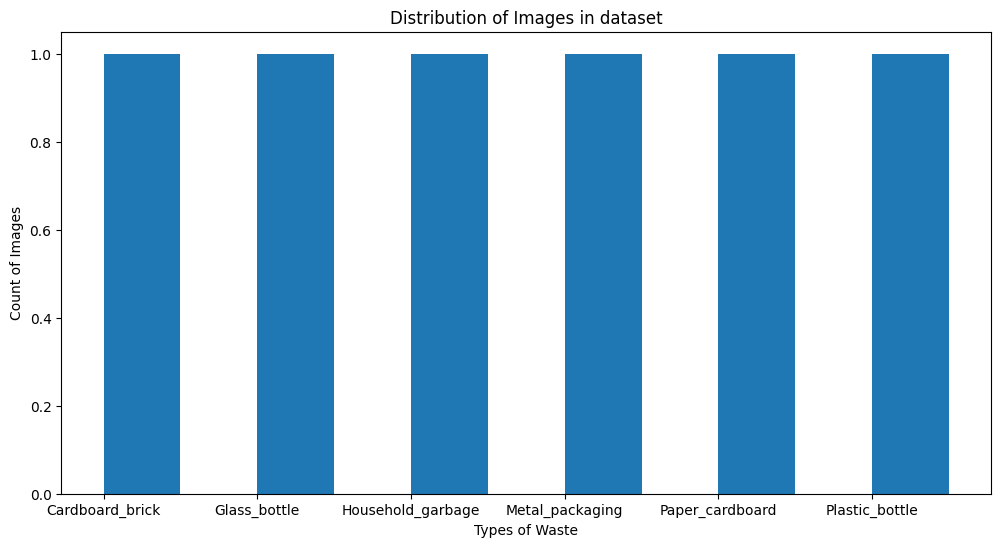

In [ ]:
from sklearn.utils.multiclass import unique_labels
#Plotting Bar Graph
labels_set=set(y_sampled)
labels_list=list(labels_set)
plt.figure(figsize=(12, 6))  # width:12, height:6
plt.bar(categories, [labels_list.count(x) for x in labels_list], align='edge', width=0.5)
plt.title("Distribution of Images in dataset");
plt.xlabel('Types of Waste');
plt.ylabel('Count of Images');

In [ ]:
#Splitting the data into training and testing
xtrain, xtest,ytrain,ytest = train_test_split(X_sampled, y_sampled, test_size = 0.08)

In [ ]:
#Converting the data into array for easy computation
xtrain = np.array(xtrain, dtype=np.float32)
xtest = np.array(xtest, dtype=np.float32)

In [ ]:
print(len(xtrain))

7925


The length of the dataset is now 7925 and all the classes are balanced

Applying Decision Tree

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy', random_state=7)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [ ]:
prediction = dtc.predict(xtest)
accuracy_dtc = dtc.score(xtest,ytest)

In [ ]:
print('Accuracy: ', accuracy_dtc)
print('Prediction: ', categories[prediction[0]])

Accuracy:  0.7130434782608696
Prediction:  Household_garbage


In [ ]:
from sklearn import metrics
print(metrics.classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       110
           1       0.76      0.72      0.74       137
           2       0.74      0.73      0.74       109
           3       0.75      0.72      0.73       116
           4       0.72      0.71      0.72       115
           5       0.56      0.67      0.61       103

    accuracy                           0.71       690
   macro avg       0.72      0.71      0.71       690
weighted avg       0.72      0.71      0.72       690



In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(ytest, prediction)

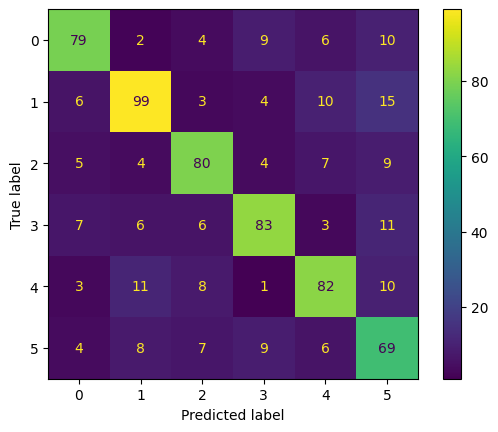

In [ ]:
#Plotting the confusion matrix

color='white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()

In [ ]:
result = pd.DataFrame({'original' : ytest,'predicted' : prediction})
result

,original,predicted
0,1,2
1,0,0
2,3,3
3,3,3
4,0,0
...,...,...
685,1,1
686,4,4
687,5,5
688,2,2


Applying Random Forest

In [ ]:
rf=RandomForestClassifier(n_estimators= 100, criterion="entropy")

In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy')

In [ ]:
prediction = rf.predict(xtest)
accuracy = rf.score(xtest,ytest)

In [ ]:
print('Accuracy: ', accuracy)
print('Prediction: ', categories[prediction[0]])

Accuracy:  0.8666666666666667
Prediction:  Glass_bottle


In [ ]:
from sklearn import metrics
print(metrics.classification_report(ytest, prediction))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       110
           1       0.93      0.85      0.89       137
           2       0.85      0.94      0.89       109
           3       0.90      0.82      0.86       116
           4       0.89      0.93      0.91       115
           5       0.75      0.80      0.77       103

    accuracy                           0.87       690
   macro avg       0.87      0.87      0.86       690
weighted avg       0.87      0.87      0.87       690



The accuracy obtained using random forest classifier is 89% which is better than the previous value 83%

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, prediction)

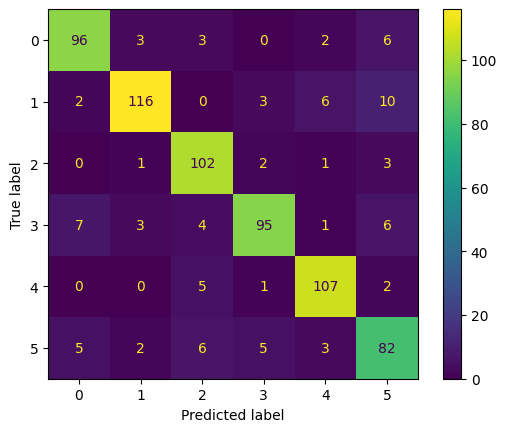

In [ ]:

#Plotting the confusion matrix
color='white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()


In [ ]:
result = pd.DataFrame({'original' : ytest,'predicted' : prediction})
result

,original,predicted
0,1,1
1,0,0
2,3,3
3,3,3
4,0,0
...,...,...
685,1,1
686,4,4
687,5,5
688,2,2


#**ResNet50**

In [ ]:
# Set Resize variable
IMAGE_SIZE = [224, 224] # This is my desired image size... and also ResNet50 accepts image of 224*224.

In [ ]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# Usefule for getting number of output classes.
# folders = glob('../input/car-brand-images-dataset/Train/*')
folders = glob(train_path + '/*')
folders

['/tmp/train_set/Cardboard_brick',
 '/tmp/train_set/Household_garbage',
 '/tmp/train_set/Metal_packaging',
 '/tmp/train_set/Paper_cardboard',
 '/tmp/train_set/Plastic_bottle',
 '/tmp/train_set/Glass_bottle']

In [ ]:
waste_label=['Cardboard_brick','Glass_bottle','Household_garbage','Metal_packaging','Paper_cardboard','Plastic_bottle']

In [ ]:
# Set the flatten layer.
x = Flatten() (resnet.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
# Create a model Object
model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# Use the Image Data Generator

# from tensorflow.keras.proprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size = 220,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 7018 images belonging to 6 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(
    test_path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 157 images belonging to 6 classes.


In [ ]:
# Fit the model.

history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 50,
    steps_per_epoch = 32,
    validation_steps = 5
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 181s 5s/step - loss: 4.5049 - accuracy: 0.2596 - val_loss: 2.1346 - val_accuracy: 0.2420
Epoch 2/50
32/32 [==============================] - 148s 5s/step - loss: 1.3964 - accuracy: 0.4875 - val_loss: 2.2139 - val_accuracy: 0.2102
Epoch 3/50
32/32 [==============================] - 152s 5s/step - loss: 1.1850 - accuracy: 0.5543 - val_loss: 1.9302 - val_accuracy: 0.3057
Epoch 4/50
32/32 [==============================] - 146s 5s/step - loss: 1.0846 - accuracy: 0.6003 - val_loss: 1.9540 - val_accuracy: 0.3185
Epoch 5/50
32/32 [==============================] - 146s 5s/step - loss: 1.0170 - accuracy: 0.6150 - val_loss: 1.9304 - val_accuracy: 0.3185
Epoch 6/50
32/32 [==============================] - 145s 5s/step - loss: 0.9519 - accuracy: 0.6552 - val_loss: 2.0511 - val_accuracy: 0.3248
Epoch 7/50
32/32 [==============================] - 145s 5s/step - loss: 0.9302 - accuracy: 0.6569 - val_loss: 2.0764 - val_accuracy: 0.3631
Epoch 8/50
32/32 [======

In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

#Visualise

In [ ]:
# Plot the Loss

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

In [ ]:
# Plot the Accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')

#Save the model

In [ ]:
# Save it as a h5 file
from tensorflow.keras.models import load_model

saved_model=model.save('waste_segregation.h5')

In [ ]:
# tf.saved_model.load()

AttributeError: ignored

##Prediction on Test data

In [ ]:
prediction = model.predict(test_set)

In [ ]:
prediction

In [ ]:
prediction = np.argmax(prediction, axis = 1)
prediction

## **CNN Classifier**

Converting the dataset into 3x3 matrix using ImageDataGenerator from tensorflow library

In [ ]:
train = '/tmp/Dataset/train/'
val = '/tmp/Dataset/val/'

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

    )


val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

train_datagen=train_datagen.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'categorical'
)


val_datagen=val_datagen.flow_from_directory(
    '/tmp/Dataset/val/',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'categorical'
)

TypeError: ignored

The Convolutional Layer uses first 64 and then 32 filters with a 3×3 kernel as a filter and the Max Pooling Layer searches for the maximum value within a 2×2 matrix.

In [ ]:
cnn=tf.keras.Sequential()
#1st layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#2nd layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#3rd layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(8,activation='softmax'))

In [ ]:
model = cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

AttributeError: ignored

In [ ]:
result = cnn.fit(train_datagen,epochs=50,validation_data=val_datagen)

Epoch 1/50


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-650bce7f35c0>", line 1, in <module>
    result = cnn.fit(train_datagen,epochs=50,validation_data=val_datagen)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1409, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 915, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 947

KeyboardInterrupt: ignored

In [ ]:
#Determining  accuracy of test image
from tensorflow.keras.preprocessing import image
output_class = ["ewaste", "food_waste", "leaf_waste", "metal_cans", "paper_waste", "plastic_bags", "plastic_bottles", "wood_waste"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))

  plt.axis("off")
  plt.imshow(test_image) #Displaying test image
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = cnn.predict(test_image)#Predicting accuracy of test image
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

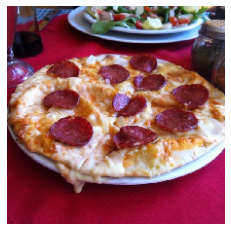

1/1 [==============================] - 0s 229ms/step
Your waste material is  food_waste  with  99.99  % accuracy


In [ ]:

waste_prediction('/content/0_6.jpg')

In [ ]:
waste_prediction('/content/metal403.jpg')

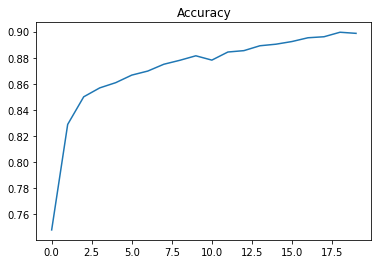

In [ ]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


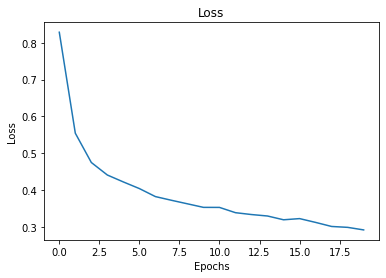

In [ ]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

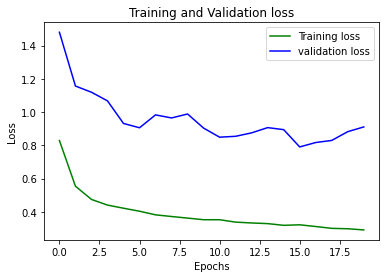

In [ ]:
loss_train = result.history['loss']
loss_val = result.history['val_loss']
epochs = range(0,20)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

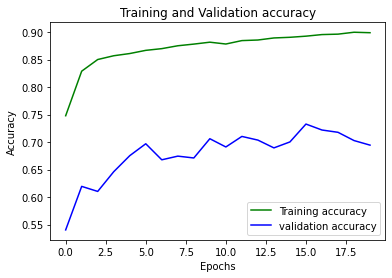

In [ ]:
loss_train = result.history['accuracy']
loss_val = result.history['val_accuracy']
epochs = range(0,20)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
count = []
count = list(train.values())
print(count)

[10066, 1179, 860, 593, 180, 670, 200, 417]


In [ ]:
import shutil
level = 1625
for i in range(len(categories)):
  dirpath = dir +str(categories[i]) + '/'
  if count[i]<level:
    for j in range(level - count[i]):
      f = random.choice(os.listdir(dirpath))
      f2 = str(f.split('.')[0]) + '_' +str(j) + '.jpg'
      temp = os.path.join(dirpath, f)
      temp2 = os.path.join(dirpath, f2)
      shutil.copy2(temp, temp2)
    if count[i]>level:
      for j in range(count[i] - level):
        f=random.choice(os.listdir(dirpath))
        temp = os.path.join(dirpath, f)
        os.remove(temp)

In [ ]:
train = '/tmp/Dataset/train/'
val = '/tmp/Dataset/val/'

In [ ]:
print(len(train))

19


In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,

    )


val_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_datagen=train_datagen.flow_from_directory(
    train,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'categorical'
)


val_datagen=val_datagen.flow_from_directory(
    '/tmp/Dataset/val/',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode = 'categorical'
)

TypeError: ignored